In [6]:
import pandas as pd

# Eğitim ve test verilerini oku
train_df = pd.read_csv("wine_train_normalized.csv")
test_df = pd.read_csv("wine_test_normalized.csv")

# İlk 5 satırı göster (kontrol amaçlı)
print(" Eğitim Verisi")
display(train_df.head())

print(" Test Verisi")
display(test_df.head())


 Eğitim Verisi


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline,Class
0,2.250568,-0.522151,0.076553,-2.486280,-0.601540,1.341251,1.728880,0.592814,2.036980,0.145705,1.230283,0.218322,1.192438,1
1,0.780728,-0.588913,-0.033362,-0.204982,0.396518,0.948417,1.215946,-1.185628,0.581188,0.771607,0.548256,0.440253,2.316050,1
2,0.114903,-0.598450,0.662763,-0.530882,-0.135779,0.277326,0.436286,-0.592814,-0.282130,-0.334154,0.676136,-0.107176,1.053911,1
3,0.906355,-0.426778,-0.033362,-0.767900,0.263444,0.228222,0.703012,0.508126,0.615044,-0.505234,1.145030,0.425458,0.699896,1
4,-1.204184,-1.294678,-1.352335,-0.234609,-0.934226,0.228222,0.261888,-0.508126,-0.299058,-1.064374,1.784430,0.795343,-1.491918,2


 Test Verisi


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline,Class
0,1.773184,-0.312329,0.479573,-0.886409,0.862279,2.568857,1.523706,-1.016253,0.970528,1.147149,-0.432159,1.283591,2.208307,1
1,-1.505690,0.383898,2.018375,0.061663,0.196907,-0.868440,0.025939,2.032506,-0.942315,-0.521925,1.145030,-0.121972,-0.479128,2
2,0.856104,0.784468,0.699402,-1.360445,1.061891,0.686528,1.051807,-1.609067,0.090282,0.020524,-0.005891,1.150432,0.253529,1
3,2.351070,-0.607988,-0.729487,-1.715972,-0.202316,0.850209,1.000514,-0.592814,0.631972,0.062251,0.505629,0.395867,0.869207,1
4,1.584743,1.633293,0.516211,-1.952990,1.860337,1.177570,1.062066,-1.355004,0.801250,0.020524,-0.304278,1.401954,-0.008134,1


In [7]:
# Eğitim ve test verisinden X (özellikler) ve y (etiketler) ayır
X_train = train_df.drop(columns=["Class"])
y_train = train_df["Class"]

X_test = test_df.drop(columns=["Class"])
y_test = test_df["Class"]


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, roc_auc_score
from sklearn.preprocessing import label_binarize

# --- 1. Model: Ham veriye budamasız karar ağacı ---
model_base = DecisionTreeClassifier(random_state=42)
model_base.fit(X_train, y_train)

# Tahmin
y_pred_base = model_base.predict(X_test)
y_proba_base = model_base.predict_proba(X_test)

# Çok sınıflı AUC için etiketi binarize et
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
auc_base = roc_auc_score(y_test_bin, y_proba_base, multi_class="ovo")

# Skorları yazdır
print(" [MODEL 1 - Ham Veri, Budamasız]")
print("Accuracy:", round(accuracy_score(y_test, y_pred_base), 3))
print("F1 Score:", round(f1_score(y_test, y_pred_base, average="macro"), 3))
print("Precision:", round(precision_score(y_test, y_pred_base, average="macro"), 3))
print("Recall:", round(recall_score(y_test, y_pred_base, average="macro"), 3))
print("MCC:", round(matthews_corrcoef(y_test, y_pred_base), 3))
print("AUC:", round(auc_base, 3))


 [MODEL 1 - Ham Veri, Budamasız]
Accuracy: 0.815
F1 Score: 0.82
Precision: 0.841
Recall: 0.809
MCC: 0.719
AUC: 0.855


In [9]:
print(" Eğitim verisi şekli (satır, sütun):", train_df.shape)
print(" Test verisi şekli (satır, sütun):", test_df.shape)


 Eğitim verisi şekli (satır, sütun): (123, 14)
 Test verisi şekli (satır, sütun): (54, 14)


In [10]:


from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, roc_auc_score
from sklearn.preprocessing import label_binarize

# --- 1. Öznitelik seçimi ---
selector = SelectKBest(score_func=mutual_info_classif, k=8)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Seçilen sütun isimlerini yazdır
selected_features = X_train.columns[selector.get_support()]
print(" Seçilen öznitelikler:", list(selected_features))

# --- 2. Budamalı karar ağacı ---
model_pruned = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42)
model_pruned.fit(X_train_selected, y_train)

# --- 3. Tahmin ---
y_pred_pruned = model_pruned.predict(X_test_selected)
y_proba_pruned = model_pruned.predict_proba(X_test_selected)

# --- 4. AUC için binarize ---
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
auc_pruned = roc_auc_score(y_test_bin, y_proba_pruned, multi_class="ovo")

# --- 5. Skorlar ---
print("\n [MODEL 2 – Öznitelik Seçimli + Budamalı]")
print("Accuracy:", round(accuracy_score(y_test, y_pred_pruned), 3))
print("F1 Score:", round(f1_score(y_test, y_pred_pruned, average="macro"), 3))
print("Precision:", round(precision_score(y_test, y_pred_pruned, average="macro"), 3))
print("Recall:", round(recall_score(y_test, y_pred_pruned, average="macro"), 3))
print("MCC:", round(matthews_corrcoef(y_test, y_pred_pruned), 3))
print("AUC:", round(auc_pruned, 3))


 Seçilen öznitelikler: ['Alcohol', 'Malic_acid', 'Total_phenols', 'Flavanoids', 'Color_intensity', 'Hue', 'OD280_OD315', 'Proline']

 [MODEL 2 – Öznitelik Seçimli + Budamalı]
Accuracy: 0.852
F1 Score: 0.86
Precision: 0.881
Recall: 0.848
MCC: 0.776
AUC: 0.935


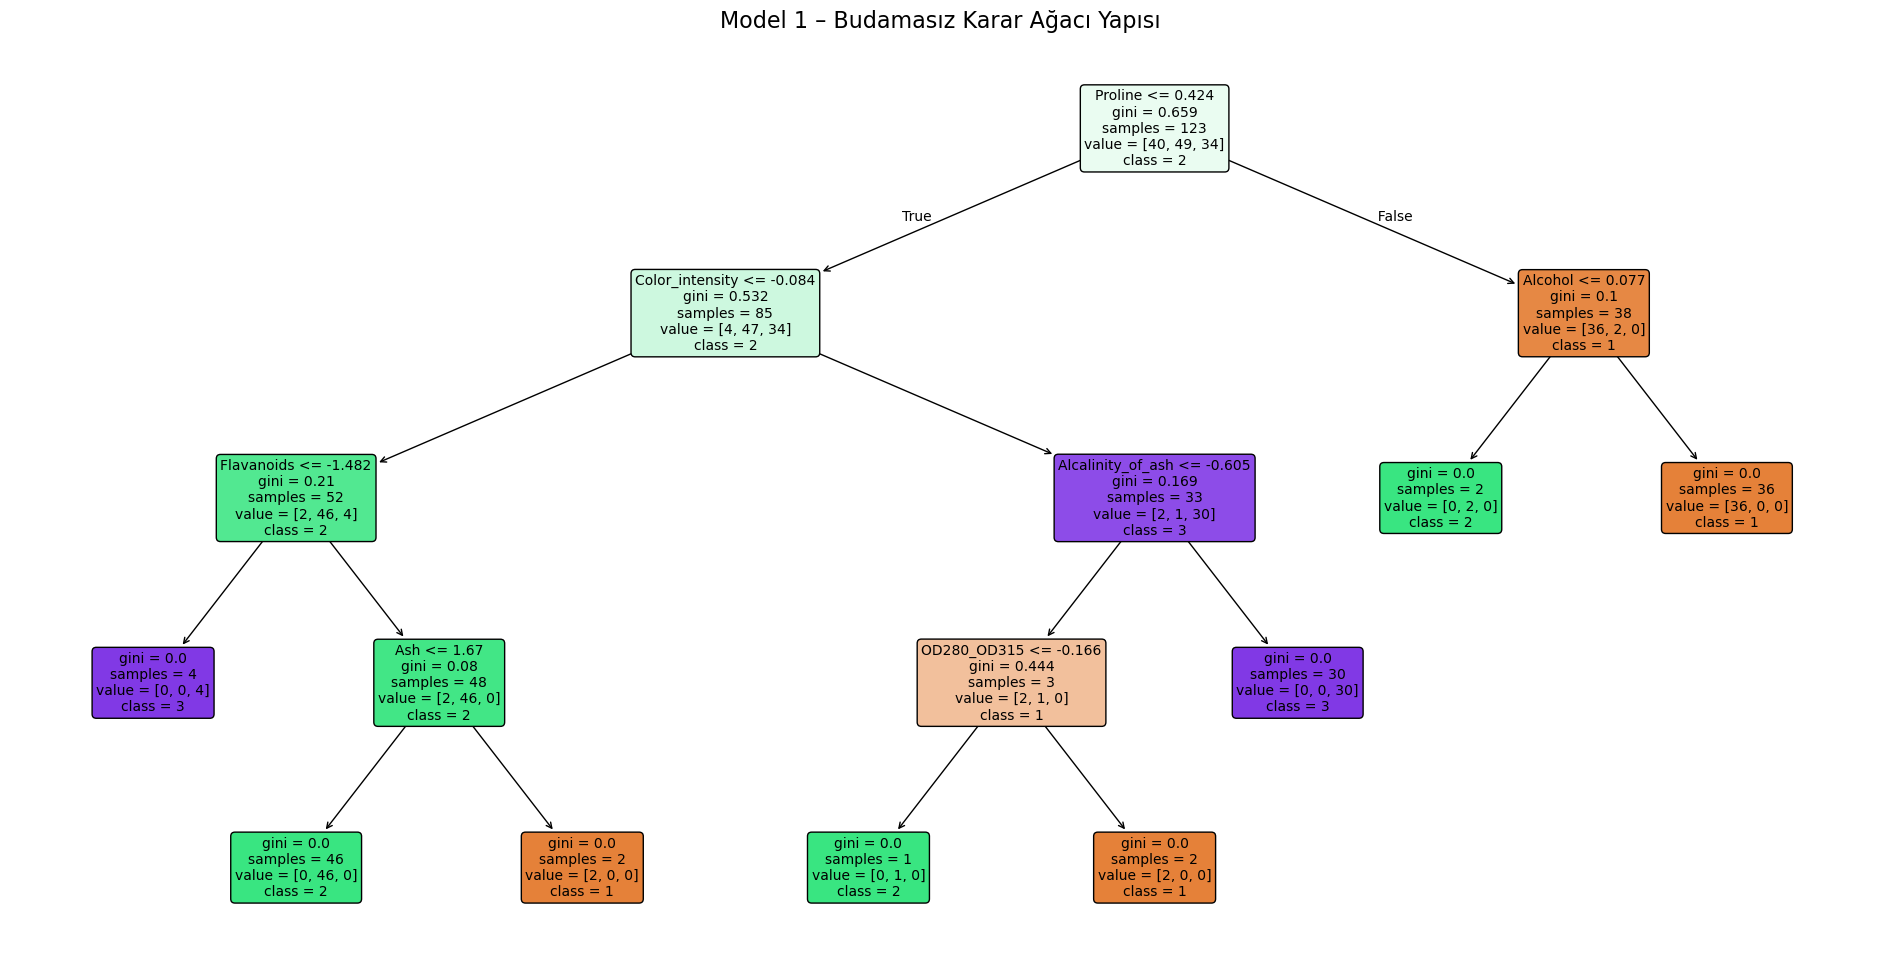

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Grafik boyutunu ayarla
plt.figure(figsize=(24, 12))

# Ağaç çizimi
plot_tree(
    model_base,                   # Model 1: ham veriyle eğittiğin ağaç
    feature_names=X_train.columns,  # Özellik adları
    class_names=["1", "2", "3"],     # Sınıf etiketleri
    filled=True,                  # Düğümleri renklendir
    rounded=True,                 # Kenarları yuvarlak yap
    fontsize=10                   # Yazı boyutu
)

# Grafiği göster
plt.title("Model 1 – Budamasız Karar Ağacı Yapısı", fontsize=16)
plt.show()


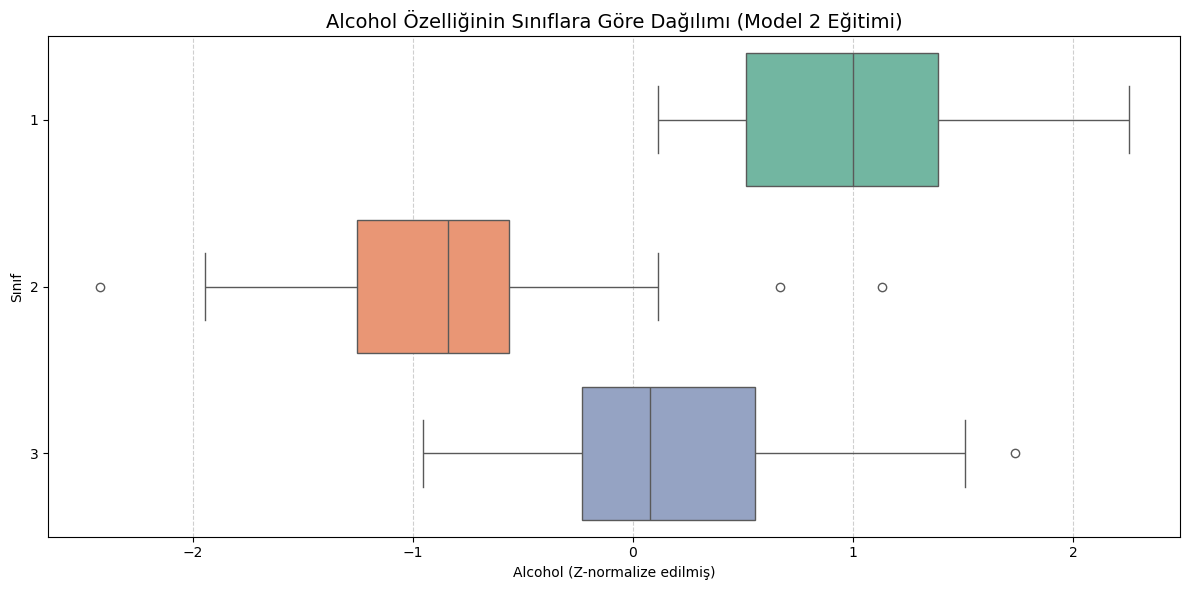

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi oku
train_df = pd.read_csv("wine_train_normalized.csv")

# Box plot (güncel tavsiye edilen kullanım)
plt.figure(figsize=(12, 6))
sns.boxplot(x="Alcohol", y="Class", hue="Class", data=train_df, orient="h", palette="Set2", dodge=False, legend=False)

plt.title("Alcohol Özelliğinin Sınıflara Göre Dağılımı (Model 2 Eğitimi)", fontsize=14)
plt.xlabel("Alcohol (Z-normalize edilmiş)")
plt.ylabel("Sınıf")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


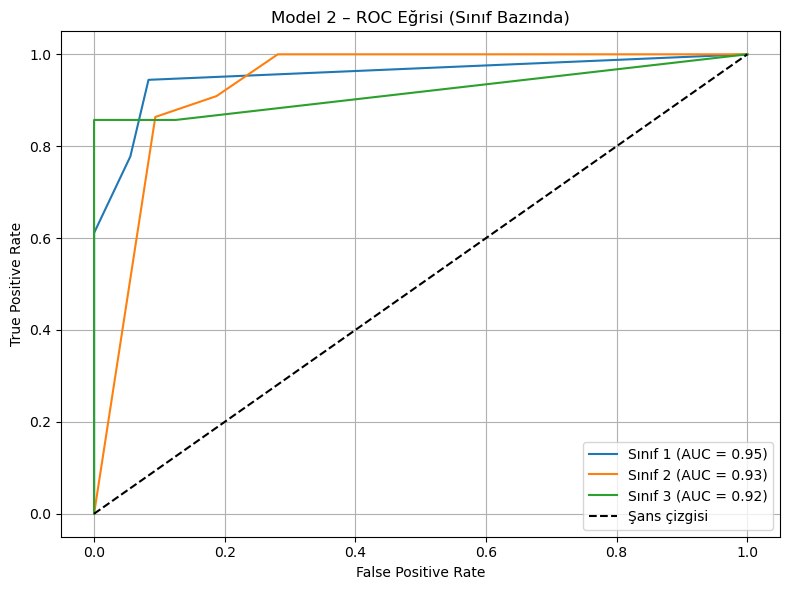

In [13]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Sınıf etiketlerini binarize et (örnek: 1 → [1,0,0])
classes = [1, 2, 3]
y_test_bin = label_binarize(y_test, classes=classes)

# ROC eğrisi için fpr, tpr ve AUC hesapla
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba_pruned[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"Sınıf {classes[i]} (AUC = {roc_auc[i]:.2f})")

# Referans çizgi (tesadüfi sınıflandırma)
plt.plot([0, 1], [0, 1], "k--", label="Şans çizgisi")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Model 2 – ROC Eğrisi (Sınıf Bazında)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


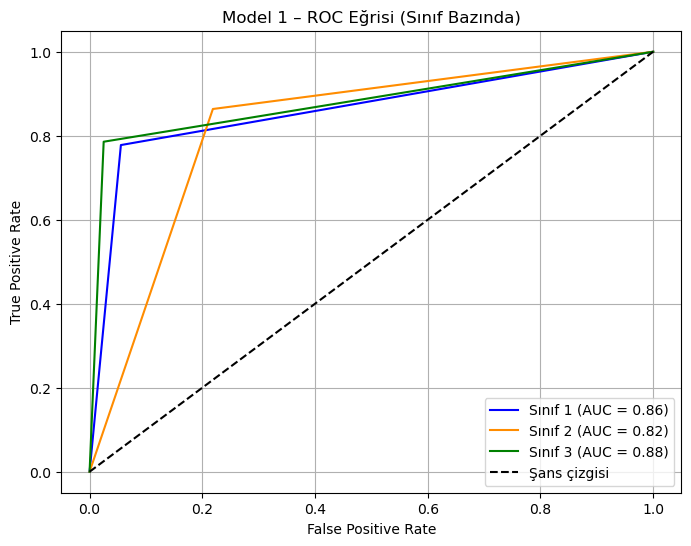

In [14]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Sınıf etiketlerini binarize et (örnek: 1 → [1 0 0], 2 → [0 1 0], ...)
y_test_bin_base = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y_test_bin_base.shape[1]

# ROC eğrisi verilerini hesapla
fpr_base = dict()
tpr_base = dict()
roc_auc_base = dict()

for i in range(n_classes):
    fpr_base[i], tpr_base[i], _ = roc_curve(y_test_bin_base[:, i], y_proba_base[:, i])
    roc_auc_base[i] = auc(fpr_base[i], tpr_base[i])

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
colors = ['blue', 'darkorange', 'green']
labels = ['Sınıf 1', 'Sınıf 2', 'Sınıf 3']

for i in range(n_classes):
    plt.plot(fpr_base[i], tpr_base[i], color=colors[i],
             label=f'{labels[i]} (AUC = {roc_auc_base[i]:.2f})')

# Şans çizgisi
plt.plot([0, 1], [0, 1], 'k--', label='Şans çizgisi')

plt.title('Model 1 – ROC Eğrisi (Sınıf Bazında)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
